# Recommendation system

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
import os
os.getcwd()

'/Users/kumarnitish/Downloads'

In [52]:
Col_names=['user_id','product_id','rating','timestamp']

In [53]:
dframe_rating=pd.read_csv('ratings_Electronics.csv',names=Col_names)

In [54]:
dframe_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
dframe_rating.shape

(7824482, 4)

In [55]:
dframe_rating.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cf8ea20>]],
      dtype=object)

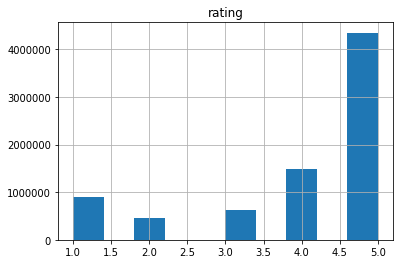

In [56]:
dframe_rating.hist(column='rating')

# Dropping Timestamp from Analysis

In [57]:
dframe_rating=dframe_rating.drop('timestamp',axis=1)

In [58]:
#Take the subset of the data

In [59]:
dframe_count=pd.DataFrame(dframe_rating.groupby('user_id')['rating'].count()) 

In [60]:
dframe_count=dframe_count[dframe_count['rating']>=50]

In [61]:
dframe_count=dframe_count.rename(columns={"user_id":"user_id","rating":"rating_count"})

In [62]:
dframe_count.head()

,rating_count
user_id,
A100UD67AHFODS,116
A100WO06OQR8BQ,132
A105S56ODHGJEK,68
A105TOJ6LTVMBG,71
A10AFVU66A79Y1,65


In [63]:
dframe_rating=pd.merge(dframe_rating,dframe_count,left_on='user_id',right_on='user_id',how='inner')

In [64]:
dframe_rating.head()

,user_id,product_id,rating,rating_count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [66]:
dframe_rating.shape

(125871, 4)

In [67]:
dframe_rating['product_id'].nunique()

48190

In [68]:
dframe_rating['user_id'].nunique()

1540

# Popularity Recommender model

#As we know that in popularity we don't need user ID as Product Id and Rating will decide which product to recommend

#calculate the mean of rating for each Product

In [69]:
ratings_mean_count = pd.DataFrame(dframe_rating.groupby('product_id')['rating'].mean()) 

#finding the number of rating to be consider in  building popularity based model.

In [70]:
ratings_mean_count['rating_counts'] = pd.DataFrame(dframe_rating.groupby('product_id')['rating'].count())  

In [71]:
ratings_mean_count.head()

,rating,rating_counts
product_id,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [72]:
# we can apply filter on rating count ie let say we can apply minimum rating count as 50

In [73]:
ratings_mean_count=ratings_mean_count[ratings_mean_count['rating_counts']>=50]

In [74]:
ratings_mean_count.head()

,rating,rating_counts
product_id,,
B00004ZCJE,4.250000,72
B00007E7JU,4.416667,60
B0002L5R78,4.611940,67
B000BQ7GW8,4.777778,54
B000HPV3RW,4.803922,51


Below are the ratings in descending order,Top 10 based on the Popularity Reccomendation. 

In [75]:
ratings_mean_count.sort_values(by='rating',ascending=False).head(10)

,rating,rating_counts
product_id,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B006W8U2MU,4.824561,57
B000QUUFRW,4.809524,84
B000HPV3RW,4.803922,51
B001TH7GSW,4.803279,61
B000BQ7GW8,4.777778,54
B000N99BBC,4.772455,167


# Collaborative Filtering

In [76]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [77]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(dframe_rating[['user_id', 'product_id', 'rating']], reader)

In [78]:
trainset, testset = train_test_split(data, test_size=0.3)

In [79]:
from surprise import SVD

In [80]:
algo = SVD()
algo.fit(trainset)

In [81]:
predictions = algo.test(testset)

In [82]:
print("SVD Model :" "Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model :Test Set
RMSE: 0.9913


0.9912959788218063

In [83]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: 
        return 0
    
def get_Ui(iid):
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['error'] = abs(df.est - df.rui)
df.head()

,uid,iid,rui,est,details,Iu,Ui,error
0,A3HCMJOGRRSAF2,B001GN7A8A,4.0,3.649732,{'was_impossible': False},40,2,0.350268
1,A1SDPA1J98UP4L,B009VKSNS6,1.0,4.079008,{'was_impossible': False},42,1,3.079008
2,AU627A4UGIW6V,B0048IW030,4.0,4.782173,{'was_impossible': False},44,10,0.782173
3,A3MV1KKHX51FYT,B0000300QQ,5.0,4.821840,{'was_impossible': False},34,0,0.178160
4,A1EH2S92FHWZRP,B00C97AF16,3.0,2.994962,{'was_impossible': False},141,8,0.005038


In [89]:
Best_prediction = df.sort_values(by='error')[:10]
Worst_prediction = df.sort_values(by='error')[-10:]

In [90]:
Best_prediction

,uid,iid,rui,est,details,Iu,Ui,error
33309,A362FM6FYA1SYS,B004V4IWHY,5.0,5.0,{'was_impossible': False},39,10,0.0
37109,AEIB3UR05OP7A,B0034CL2ZI,5.0,5.0,{'was_impossible': False},32,71,0.0
26342,AEJAGHLC675A7,B000ZMCILW,5.0,5.0,{'was_impossible': False},167,11,0.0
10091,AEJAGHLC675A7,B0034CL2ZI,5.0,5.0,{'was_impossible': False},167,71,0.0
10128,A2PREU4LOFQRB1,B000IV413S,5.0,5.0,{'was_impossible': False},61,5,0.0
35370,A2W0XCWOK3MW6F,B003MAJMXQ,5.0,5.0,{'was_impossible': False},36,11,0.0
15485,A3REK3OFONWB1Q,B00017LSPI,5.0,5.0,{'was_impossible': False},99,30,0.0
10155,A4UGMKUSX9XHI,B00006I53X,5.0,5.0,{'was_impossible': False},62,8,0.0
35411,A194Y47BF3CUTJ,B005WQZEYE,5.0,5.0,{'was_impossible': False},35,2,0.0
561,A2T3S3VTW65VO5,B00B588HY2,5.0,5.0,{'was_impossible': False},56,26,0.0
